In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
nano = Image.open('foto_nano.jpg') #poned la ruta a la imagen que querais.
nano_BN = nano.convert('L') #la pasamos a escala de grises ya que es mucho más facil trabajar asi y no en color. pesa todo menos.


Descomponer la matriz en valores singulares es mucho mas facil si esta en blanco y negro, tendremos menos valores singulares (partiendo de que de hecho solo necesitaremos una matriz de escala de grises y no 3, una para cada color.)

In [ ]:
nanoBN_mat = np.asarray(nano_BN)
rango = la.matrix_rank(nanoBN_mat) #el rango de la matriz de la imagen, algebraicamente el rango de la matriz es igual al numero de valores singulares NO NULOS de la misma.

In [ ]:
U,S,V = la.svd(nanoBN_mat, full_matrices= False)

Descomponemos la matriz en valores singulares. algebraicamente no es algo trivial y basicamente S es la matriz que tiene en la diagonal principal todos los valores no singulares de la matriz de la foto. Por suerte el bendito python y sus librerias nos hace tooooodo el trabajo y nos lo descompone, y no solo lo descompone sino que encima nos da el vector S ordenado en orden ascendente.
A mas alto sea el lamda, mas informacion (o mas relevante) guarda ese valor singular. Al final los valores singulares simplemente nos dicen de que forma se expande linealmente una matriz. Asi que si pasamos una imagen a matriz, sacamos su informacion mas relevante descomponiendola en valores singulares.

In [ ]:
def aprox_SVD(U,S,V,k): #funcion que se va a quedar solo con los k valores singulares de la matriz original.
  return S[0:k]*U[:,0:k]@V[0:k,:] #S no es una matriz en realidad es un vector pero bueno matriz de dimension 1 para matriz diagonal usar np.diag(S)
def porcen(shape, k): #funcion sencilla para calcular el porcentaje de datos que ahorro
  return np.round((shape[0]*k + k + k*shape[1])/(shape[0]*shape[1])*100,4)

In [ ]:
p33 = aprox_SVD(U,S,V,33) #como 33? sentido de esto?
p50 = aprox_SVD(U,S,V,50)
p200 = aprox_SVD(U,S,V,200)
#probamos con distintos valores.

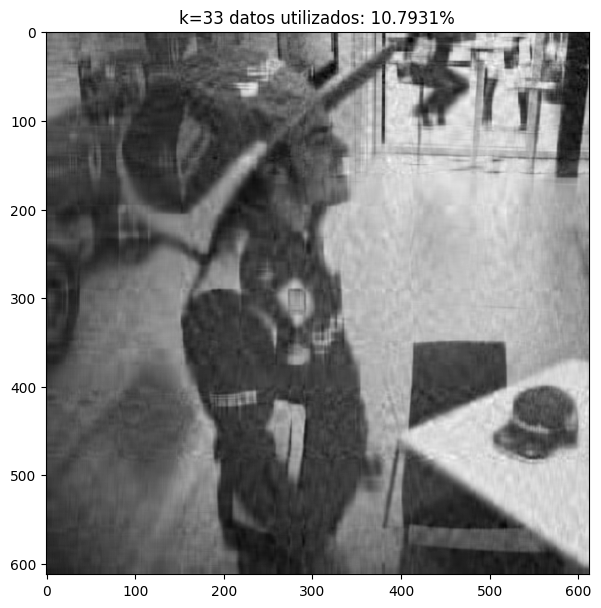

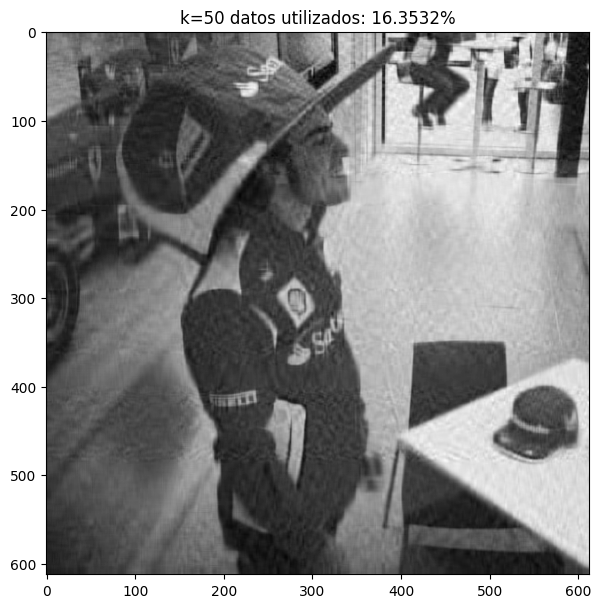

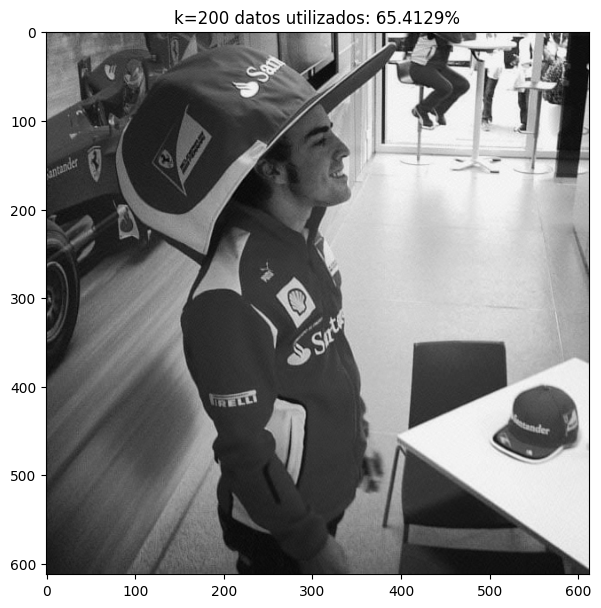

In [15]:
plt.figure(figsize=(7,8))
plt.title('k=33' + ' datos utilizados: ' + str(porcen(nanoBN_mat.shape,33)) + '%')
plt.imshow(p33, cmap='gray')
##################################
plt.figure(figsize=(7,8))
plt.title('k=50' + ' datos utilizados: ' + str(porcen(nanoBN_mat.shape,50)) + '%')
plt.imshow(p50, cmap='gray')
###############################
plt.figure(figsize=(7,8))
plt.title('k=200' + ' datos utilizados: ' + str(porcen(nanoBN_mat.shape,200))+ '%')
plt.imshow(p200, cmap='gray')
#con esta cantidad de datos (y con menos, la diferencia es casi imperceptible)